In [1]:
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_1state_model, CSTR_3state_model
from Solvers import ESDIRK
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# ESDIRK23

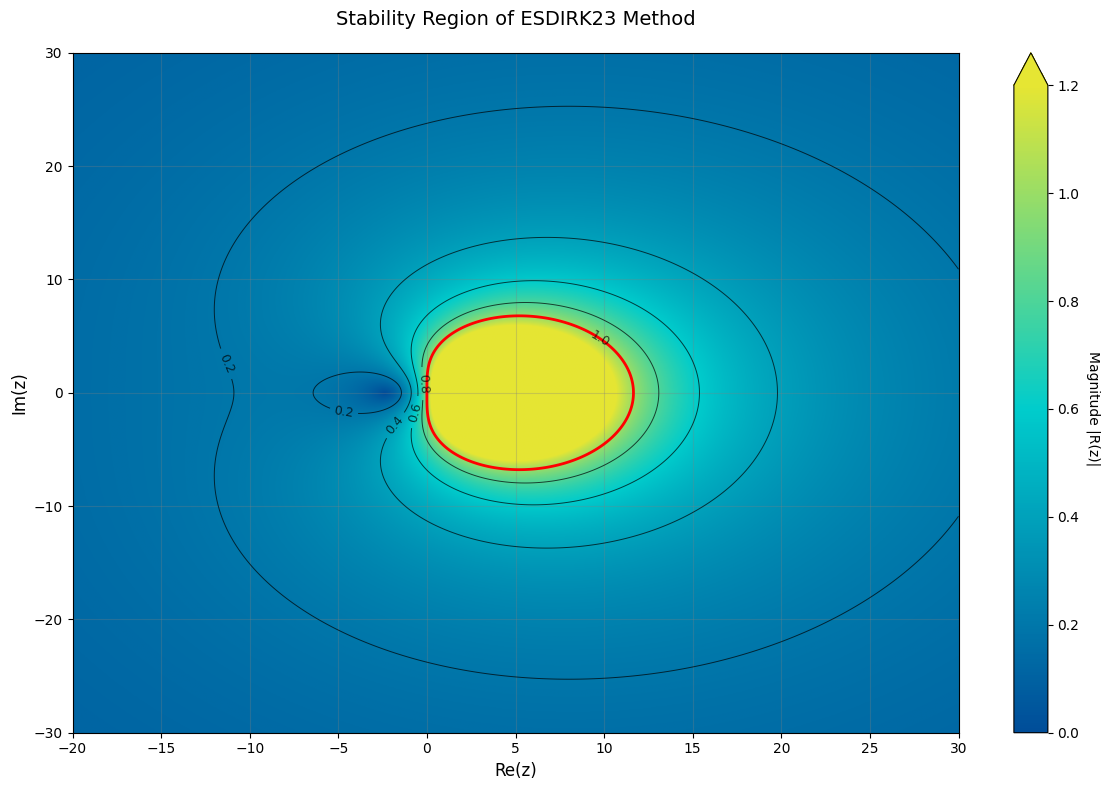

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def esdirk23_stability_function(z):
    """Stability function for ESDIRK23 method"""
    gamma = 1 - np.sqrt(2)/2
    denom = (1 - gamma*z)**2
    return (1 + z*(1 - 2*gamma) + (1/2 - 2*gamma + gamma**2)*z**2) / denom

def plot_stability_region():
    # Create grid
    x = np.linspace(-20, 30, 1000)
    y = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute stability function
    R = np.abs(esdirk23_stability_function(Z))
    
    # Create viridis-like colormap with enhanced contrast
    colors = [(0, 0.3, 0.6), (0, 0.8, 0.8), (0.9, 0.9, 0.2)]  # Blue -> Cyan -> Yellow
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Plot magnitude with enhanced contrast
    im = plt.imshow(R, extent=[-20, 30, -30, 30], 
                   cmap=cmap, vmin=0, vmax=1.2,
                   origin='lower', aspect='auto')
    
    # Add contour lines
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    cs = plt.contour(X, Y, R, levels=levels, 
                    colors='black', linewidths=0.7, alpha=0.7)
    plt.clabel(cs, inline=True, fontsize=9, fmt='%1.1f')
    
    # Highlight the stability boundary
    plt.contour(X, Y, R, levels=[1], colors='red', linewidths=2)
    
    # Formatting
    plt.title('Stability Region of ESDIRK23 Method', fontsize=14, pad=20)
    plt.xlabel('Re(z)', fontsize=12)
    plt.ylabel('Im(z)', fontsize=12)
    plt.grid(True, color='gray', alpha=0.3)
    
    # Colorbar with label
    cbar = plt.colorbar(im, extend='max')
    cbar.set_label('Magnitude |R(z)|', rotation=270, labelpad=15)
    
    # Set axis ticks
    plt.xticks(np.arange(-20, 31, 5))
    plt.yticks(np.arange(-30, 31, 10))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_stability_region()